# IE406 Machine Learning  [LAB-3]
---
### Devdeep Shetrajiwala : 202001150
### Divya Patel : 202001420

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
%matplotlib inline
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
import scipy
from scipy import optimize
import os
import seaborn as sns
from mpl_toolkits import mplot3d
from scipy.sparse import vstack
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.model_selection import train_test_split

plt.rcParams['font.family'] = 'serif'

# Question 1

In this question we will use the data given in file “Social_Network_Ads.csv” which is a categorical dataset to determine whether a user purchased a product or not by using three features to determine user’s decision. Visualize the data by 3D plotting features using different colors for label 0 and 1. Use data in files “Social_Network_Ads.csv” to perform logistic regression by implementing logistic function and with available library function and compare your results. Use 90% data points from each set for training and remaining 10% for testing the accuracy of classification. Using confusion matrix find accuracy, precision, F1 score and recall.

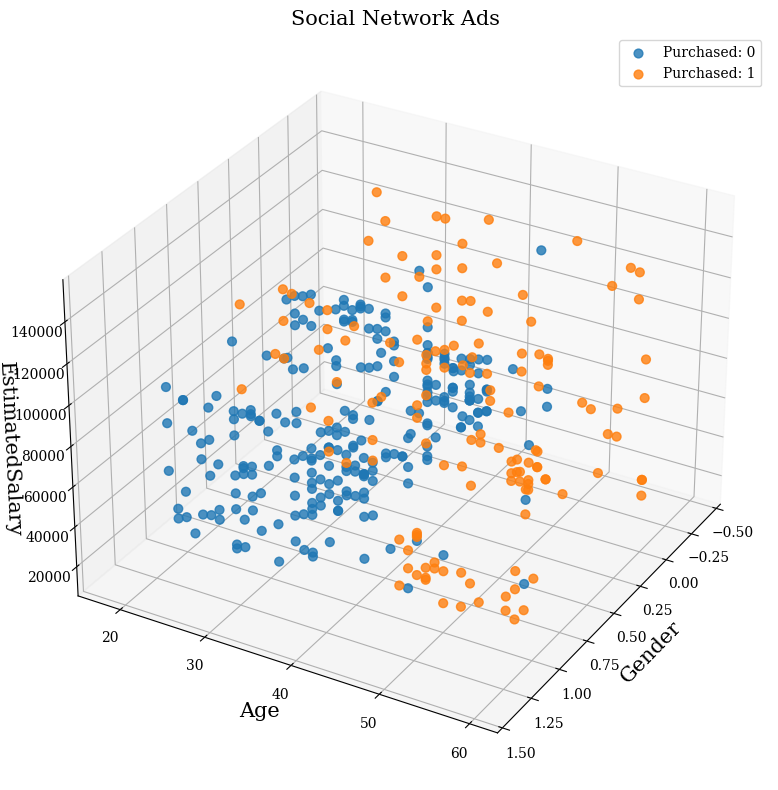

In [186]:

data = pd.read_csv('Social_Network_Ads.csv')
data['Gender'].replace(['Male','Female'],[0,1], inplace=True)
X = np.array(data.iloc[:,1:4])
Y = np.array(data.iloc[:,4])

#3D Plot 
x_0 = X[Y==0]
x_1 = X[Y==1]
y_0 = Y[Y==0]
y_1 = Y[Y==1]

fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection ="3d")
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3, alpha = 0.2)
sctt = ax.scatter3D(x_0[:,0], x_0[:,1], x_0[:,2],alpha = 0.8,marker ='o', s=40)
sctt = ax.scatter3D(x_1[:,0], x_1[:,1], x_1[:,2],alpha = 0.8,marker ='o', s=40)
plt.title("Social Network Ads", fontsize=15)
ax.set_xlabel('Gender', fontsize=15)
ax.set_xlim(-0.5,1.5)
ax.set_ylabel('Age', fontsize=15)
ax.set_zlabel('EstimatedSalary', fontsize=15)
ax.legend(['Purchased: 0','Purchased: 1'])

# Add some customization to the plot
ax.view_init(elev=30, azim=30) # Change the viewing angle
plt.tight_layout() # Adjust the layout to fit the figure

plt.show()


In [187]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def weighted_sum(theta, x):
    return np.dot(x, theta)

def positive_class_probability(theta, x):
    return sigmoid(weighted_sum(theta, x))
    
def cost_function(theta, x, y):
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(y * np.log(positive_class_probability(theta, x)) + (1 - y) * np.log(1 - positive_class_probability(theta, x)))
    return total_cost

def cost_gradient(theta, x, y):
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(weighted_sum(theta, x)) - y)
    
def fit(x, y, theta):
    opt_weights = scipy.optimize.fmin_tnc(func=cost_function, x0=theta, fprime=cost_gradient,args=(x, y.flatten()))
    return opt_weights[0]

# Prepare the data
X_own = data.iloc[:, 1:4]
X_own = np.c_[np.ones((X_own.shape[0], 1)), X]
Y_own = data[['Purchased']].values
theta = np.zeros((X_own.shape[1], 1))

# Split the data into training and test sets
X_train_own, X_test_own, Y_train_own, Y_test_own = train_test_split(X_own, Y_own, test_size=0.1,random_state=4)

# Find the optimal weights for the logistic regression model
parameters = fit(X_train_own, Y_train_own, theta)

print('Optimal weights: ', parameters)

Optimal weights:  [-1.21952961e+01 -2.43031747e-01  2.32309171e-01  3.54290856e-05]


  NIT   NF   F                       GTG
    0    1  6.931471805599453E-01   9.15062809E+06
tnc: fscale = 0.000330578
    1    4  6.890485346824844E-01   8.82269654E+01
tnc: fscale = 0.106463
    2    7  6.876390712710871E-01   5.20801466E+01
tnc: stepmx = 1000
    3   11  3.689851273418380E-01   9.31580005E+05
tnc: fscale = 0.00103607
    4   14  3.683954948628807E-01   2.24841938E+01
tnc: fscale = 0.210893
    5   17  3.683742372160593E-01   1.87050205E-03
tnc: fscale = 23.1218
    6   20  3.683530500798038E-01   1.74302097E-03
    7   23  3.622839869038227E-01   3.55054159E+03
tnc: fscale = 0.0167823
    8   26  3.622812475209489E-01   3.26141984E-04
tnc: fscale = 55.3728
    9   29  3.622806500370176E-01   6.65313061E-05
   10   32  3.602984380050761E-01   4.65868239E+04
tnc: fscale = 0.00463307
   11   35  3.602685811445731E-01   4.11346090E-03
tnc: fscale = 15.5918
   12   38  3.599238140793233E-01   7.58921201E-01
   13   41  3.595594207962378E-01   1.75188362E+03
tnc: fscale = 

In [188]:
def predict(x):
    theta = parameters[:, np.newaxis]
    return positive_class_probability(theta, x)

def accuracy(x, actual_classes, probab_threshold=0.5):
    predicted_classes = (predict(x) >= 
                         probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy

accuracy(X_test_own, Y_test_own.flatten())

def predict_class(x,threshold=0.5):
    return predict(x) >= threshold


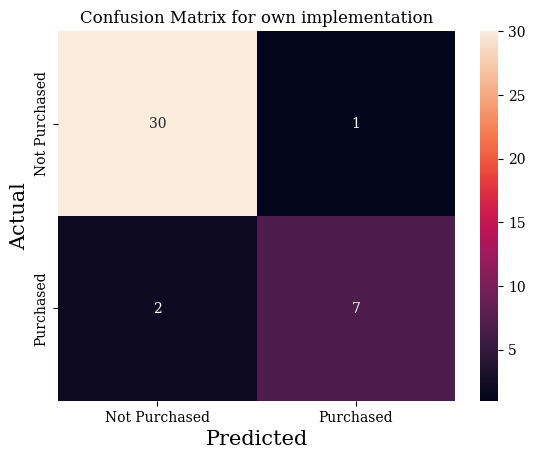

Accuracy:  0.925

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       0.88      0.78      0.82         9

    accuracy                           0.93        40
   macro avg       0.91      0.87      0.89        40
weighted avg       0.92      0.93      0.92        40



In [191]:
#confusion_matrix
y_pred = predict_class(X_test_own)
tn, fp, fn, tp = confusion_matrix(Y_test_own, y_pred).ravel()
sns.heatmap([[tn,fp],[fn,tp]],annot=True,xticklabels=['Not Purchased','Purchased'],yticklabels=['Not Purchased','Purchased'])
plt.xlabel('Predicted',fontsize=15)
plt.ylabel('Actual',fontsize=15)
plt.title('Confusion Matrix for own implementation')
plt.show()

print('Accuracy: ', accuracy(X_test_own, Y_test_own.flatten()))
print()
print(classification_report(Y_test_own, y_pred))

#### Using Sklearn Logistic Regression

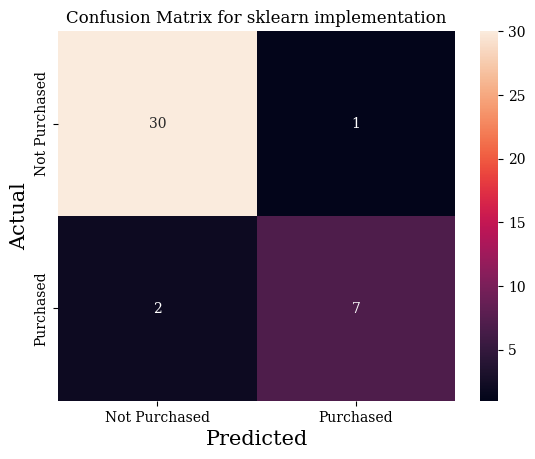

Accuracy of sklearn model:  0.925

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        31
           1       0.88      0.78      0.82         9

    accuracy                           0.93        40
   macro avg       0.91      0.87      0.89        40
weighted avg       0.92      0.93      0.92        40



In [192]:
sc = StandardScaler()
X = sc.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.9, test_size = 0.1, random_state=4)
clf = LogisticRegression().fit(x_train, y_train)
y_pred = clf.predict(x_test[:, :])

#confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sns.heatmap([[tn,fp],[fn,tp]],annot=True,xticklabels=['Not Purchased','Purchased'],yticklabels=['Not Purchased','Purchased'])
plt.xlabel('Predicted',fontsize=15)
plt.ylabel('Actual',fontsize=15)
plt.title('Confusion Matrix for sklearn implementation')
plt.show()

#accuracy, precision, F1 score and recall.
accuracy_inbuilt = accuracy_score(y_test, y_pred)
precision_inbuilt = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
recall_inbuilt = recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
f1_inbuilt = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print('Accuracy of sklearn model: ', accuracy_inbuilt)
print()
print(classification_report(y_test, y_pred))

### Observation/ Justification

We can observe that the logistic regression implementation that we performed on our own gave exactly the same results as the one given by the library function. The accuracy, precision, F1 score and recall values are also the same.

This is due to the fact that the library function also uses the same logistic regression algorithm to predict the values as we have implemented hence the results are the same for both the cases and the confusion matrix also gives the same values for both the cases as the values predicted are the same.

# Question 2

You will work with a widely used Iris dataset. The Iris Dataset contains four features (sepal length, sepal width, petal length, and petal width) of 50 samples of three species of Iris (Iris setosa, Iris virginica, and Iris versicolor). Plot features’ histogram. Compute pdf and compare it with histogram. perform the exploratory data analysis by plotting the basic statistics like mean, median, min, and max value of each feature (sepal and petal lengths and widths) for each of the three classes (setosa, virginica, and versicolor).

### Code and Results

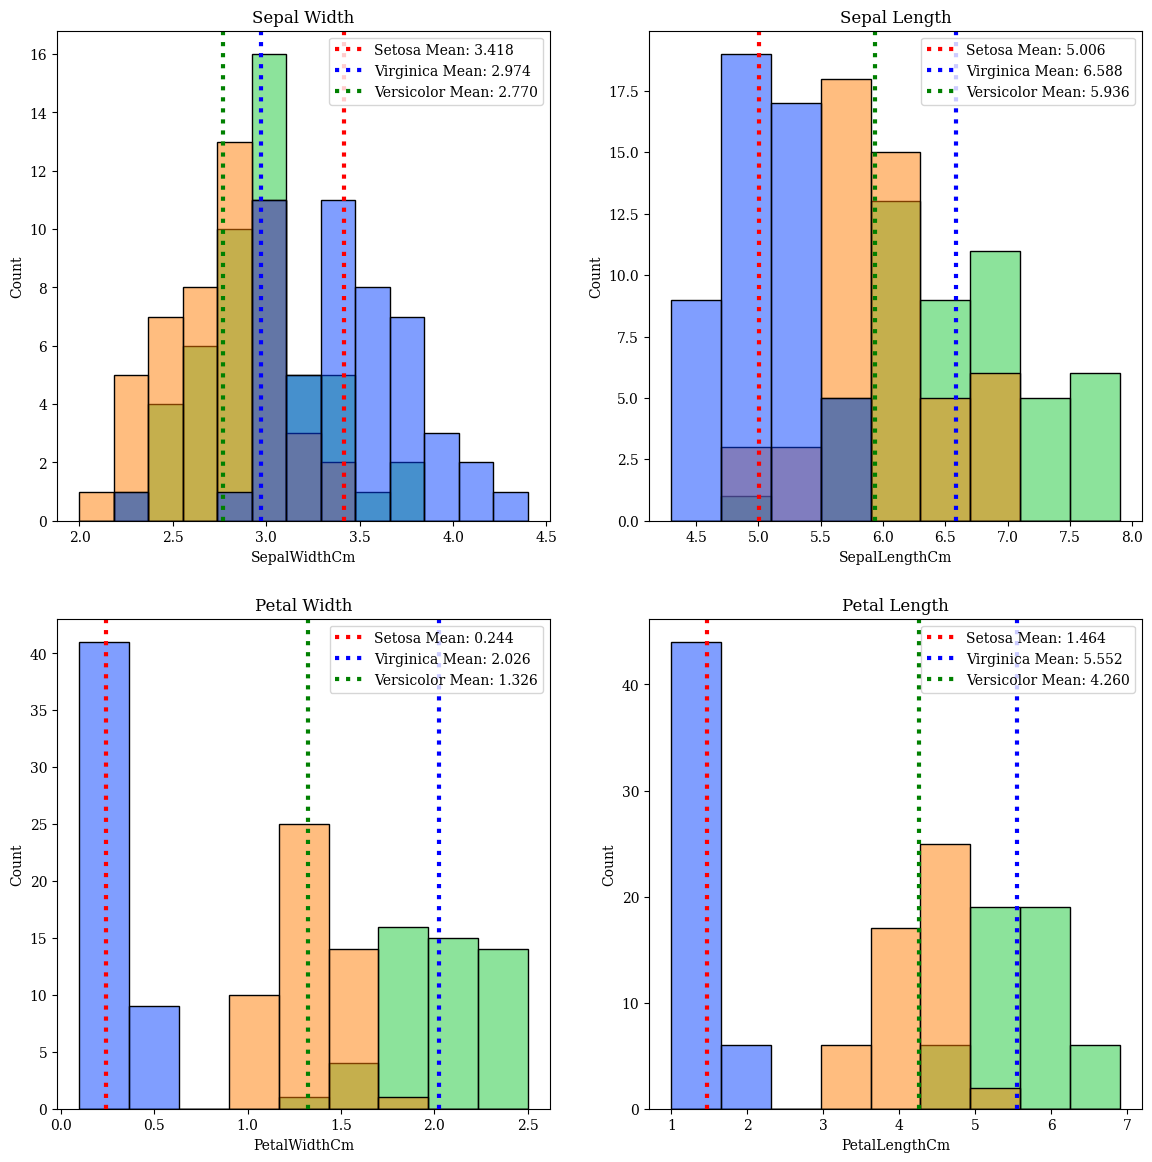

In [ ]:
# Load the data
data = pd.read_csv('Iris.csv')
X = np.array(data.iloc[:,1:5])
Y = np.array(data.iloc[:,5])

# Split the data by species
setosa_data = data[data['Species']=='Iris-setosa']
versicolor_data = data[data['Species']=='Iris-versicolor']
virginica_data = data[data['Species']=='Iris-virginica']

# Create a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

# Plot the Sepal Width data
sns.histplot(data=data, x="SepalWidthCm", hue="Species", palette="bright", ax=axs[0, 0])
axs[0, 0].axvline(setosa_data['SepalWidthCm'].mean(), color='red', linestyle=':', linewidth=3, label = "Setosa Mean: {:.3f}".format(setosa_data['SepalWidthCm'].mean()))
axs[0, 0].axvline(virginica_data['SepalWidthCm'].mean(), color='blue', linestyle=':', linewidth=3, label = "Virginica Mean: {:.3f}".format(virginica_data['SepalWidthCm'].mean()))
axs[0, 0].axvline(versicolor_data['SepalWidthCm'].mean(), color='green', linestyle=':', linewidth=3, label = "Versicolor Mean: {:.3f}".format(versicolor_data['SepalWidthCm'].mean()))
axs[0, 0].set_title('Sepal Width')
axs[0, 0].legend()

# Plot the Sepal Length data
sns.histplot(data=data, x="SepalLengthCm", hue="Species", palette="bright", ax=axs[0, 1])
axs[0, 1].axvline(setosa_data['SepalLengthCm'].mean(), color='red', linestyle=':', linewidth=3, label = "Setosa Mean: {:.3f}".format(setosa_data['SepalLengthCm'].mean()))
axs[0, 1].axvline(virginica_data['SepalLengthCm'].mean(), color='blue', linestyle=':', linewidth=3, label = "Virginica Mean: {:.3f}".format(virginica_data['SepalLengthCm'].mean()))
axs[0, 1].axvline(versicolor_data['SepalLengthCm'].mean(), color='green', linestyle=':', linewidth=3, label = "Versicolor Mean: {:.3f}".format(versicolor_data['SepalLengthCm'].mean()))
axs[0, 1].set_title('Sepal Length')
axs[0, 1].legend()

# Plot the Petal Width data
sns.histplot(data=data, x="PetalWidthCm", hue="Species", palette="bright", ax=axs[1, 0])
axs[1, 0].axvline(setosa_data['PetalWidthCm'].mean(), color='red', linestyle=':', linewidth=3, label = "Setosa Mean: {:.3f}".format(setosa_data['PetalWidthCm'].mean()))
axs[1, 0].axvline(virginica_data['PetalWidthCm'].mean(), color='blue', linestyle=':', linewidth=3, label = "Virginica Mean: {:.3f}".format(virginica_data['PetalWidthCm'].mean()))
axs[1, 0].axvline(versicolor_data['PetalWidthCm'].mean(), color='green', linestyle=':', linewidth=3, label = "Versicolor Mean: {:.3f}".format(versicolor_data['PetalWidthCm'].mean()))
axs[1, 0].set_title('Petal Width')
axs[1, 0].legend()

# Plot the Petal Length data
sns.histplot(data=data, x="PetalLengthCm", hue="Species", palette="bright", ax=axs[1, 1])
axs[1, 1].axvline(setosa_data['PetalLengthCm'].mean(), color='red', linestyle=':', linewidth=3, label = "Setosa Mean: {:.3f}".format(setosa_data['PetalLengthCm'].mean()))
axs[1, 1].axvline(virginica_data['PetalLengthCm'].mean(), color='blue', linestyle=':', linewidth=3, label = "Virginica Mean: {:.3f}".format(virginica_data['PetalLengthCm'].mean()))
axs[1, 1].axvline(versicolor_data['PetalLengthCm'].mean(), color='green', linestyle=':', linewidth=3, label = "Versicolor Mean: {:.3f}".format(versicolor_data['PetalLengthCm'].mean()))
axs[1, 1].set_title('Petal Length')
axs[1, 1].legend()

# Show the plots
plt.show()


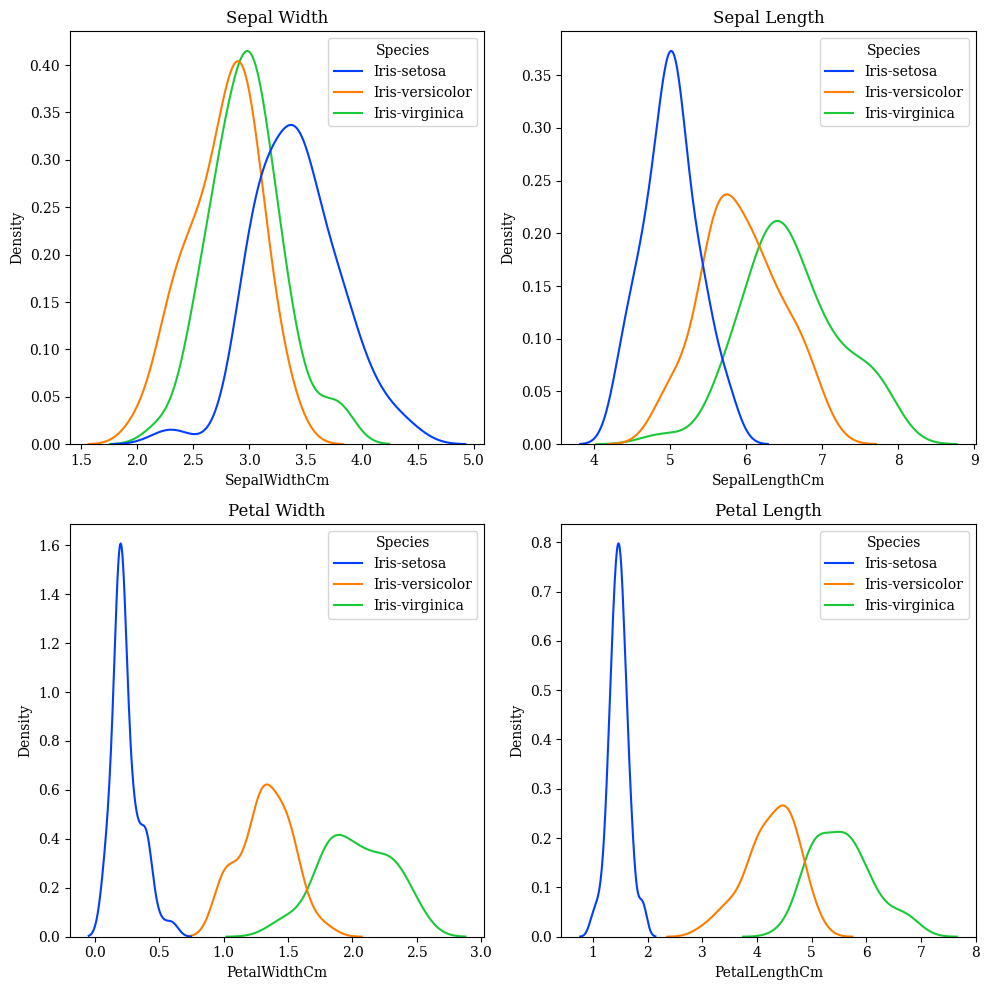

In [147]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.kdeplot(data=data, x="SepalWidthCm", hue="Species", palette="bright", ax=axs[0, 0]).set_title('Sepal Width')
sns.kdeplot(data=data, x="SepalLengthCm", hue="Species", palette="bright", ax=axs[0, 1]).set_title('Sepal Length')
sns.kdeplot(data=data, x="PetalWidthCm", hue="Species", palette="bright", ax=axs[1, 0]).set_title('Petal Width')
sns.kdeplot(data=data, x="PetalLengthCm", hue="Species", palette="bright", ax=axs[1, 1]).set_title('Petal Length')

plt.tight_layout()
plt.show()


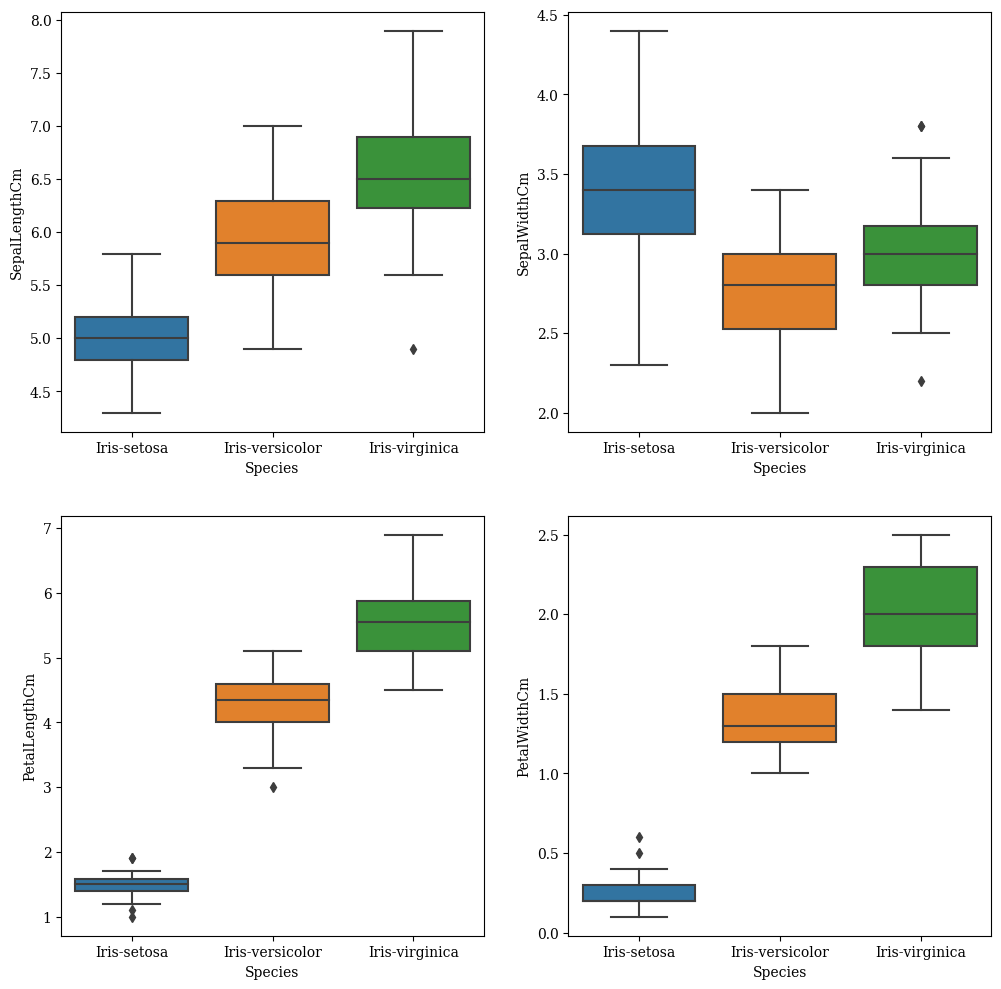

In [148]:
# data = pd.read_csv("Iris.csv")
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=data)

plt.subplot(2,2,2)
sns.boxplot(x='Species',y='SepalWidthCm',data=data)

plt.subplot(2,2,3)
sns.boxplot(x='Species',y='PetalLengthCm',data=data)

plt.subplot(2,2,4)
sns.boxplot(x='Species',y='PetalWidthCm',data=data)
plt.show()

In [149]:
#Code for basic statistics
iris=data.iloc[:,1:]
iris.groupby('Species').agg(['mean','median','min','max'])

SepalLengthCm                  SepalWidthCm                   \
                         mean median  min  max         mean median  min  max   
Species                                                                        
Iris-setosa             5.006    5.0  4.3  5.8        3.418    3.4  2.3  4.4   
Iris-versicolor         5.936    5.9  4.9  7.0        2.770    2.8  2.0  3.4   
Iris-virginica          6.588    6.5  4.9  7.9        2.974    3.0  2.2  3.8   

                PetalLengthCm                  PetalWidthCm                   
                         mean median  min  max         mean median  min  max  
Species                                                                       
Iris-setosa             1.464   1.50  1.0  1.9        0.244    0.2  0.1  0.6  
Iris-versicolor         4.260   4.35  3.0  5.1        1.326    1.3  1.0  1.8  
Iris-virginica          5.552   5.55  4.5  6.9        2.026    2.0  1.4  2.5

# Question 3

Visualize the data in the Iris Dataset by considering maximum combinations of two features in a 2D plot. Use red, green, and blue colors for labeling the three classes: Iris setosa, Iris virginica, and Iris versicolor, respectively. Comment on whether any two classes among the three can be separated by a line? Report your observations for each case.

### Code 

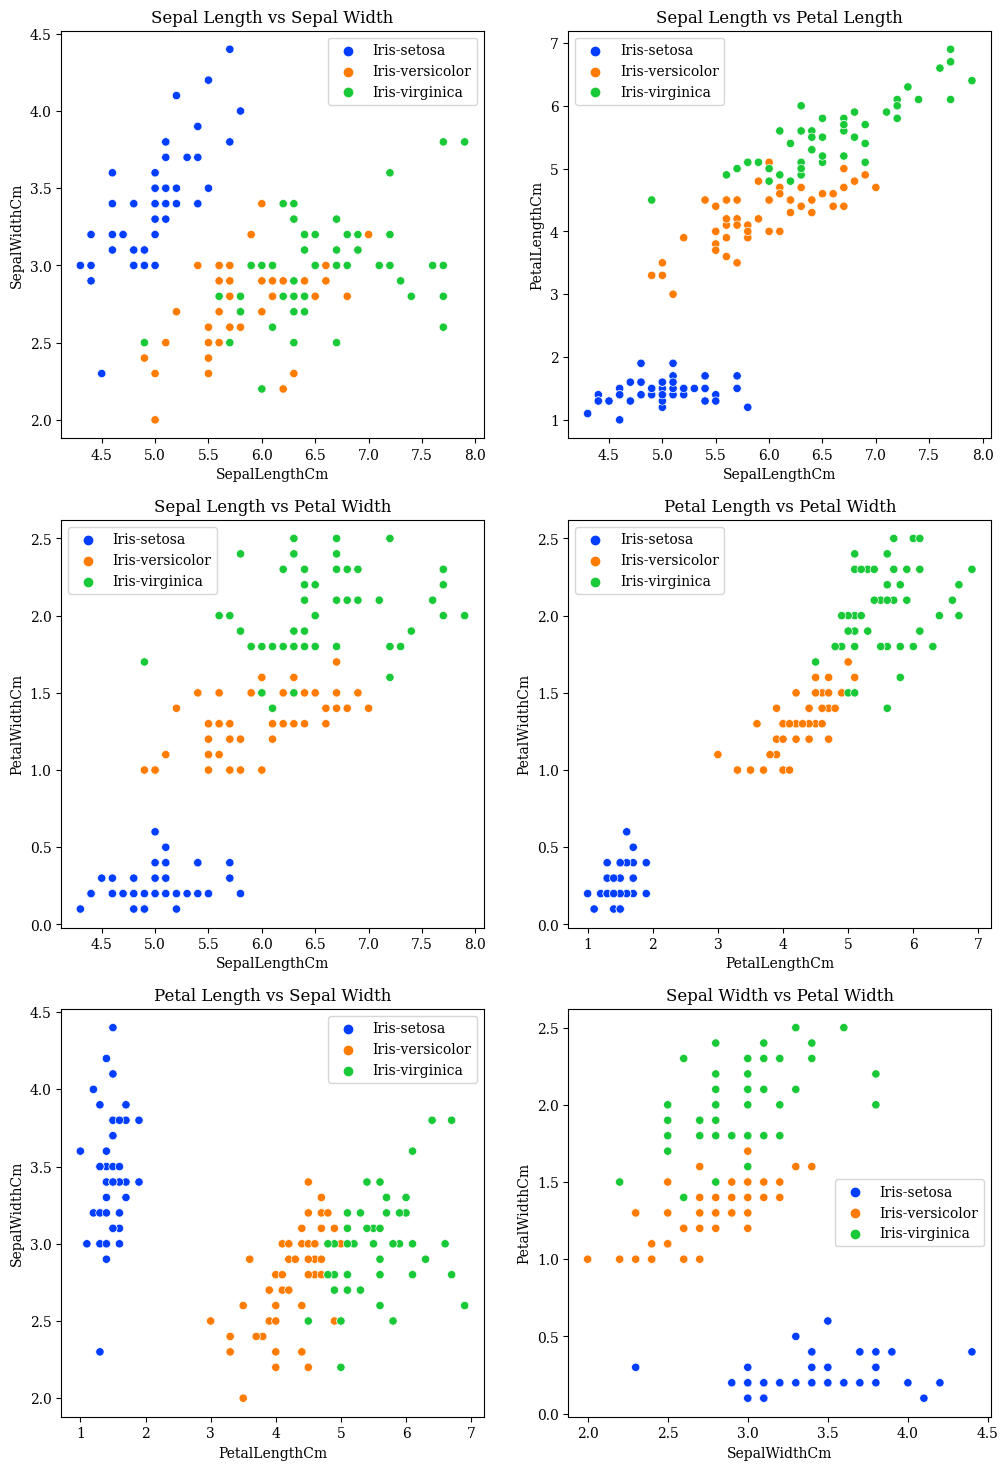

In [150]:
# Create a 3x2 grid of plots
fig, axs = plt.subplots(3, 2, figsize=(12, 18))

# Plot Sepal Length vs Sepal Width
sns.scatterplot(x=data['SepalLengthCm'], y=data['SepalWidthCm'], data=data, hue="Species", palette="bright", ax=axs[0, 0])
axs[0, 0].set_title('Sepal Length vs Sepal Width')
axs[0, 0].legend()

# Plot Sepal Length vs Petal Length
sns.scatterplot(x=data['SepalLengthCm'], y=data['PetalLengthCm'], data=data, hue="Species", palette="bright", ax=axs[0, 1])
axs[0, 1].set_title('Sepal Length vs Petal Length')
axs[0, 1].legend()

# Plot Sepal Length vs Petal Width
sns.scatterplot(x=data['SepalLengthCm'], y=data['PetalWidthCm'], data=data, hue="Species", palette="bright", ax=axs[1, 0])
axs[1, 0].set_title('Sepal Length vs Petal Width')
axs[1, 0].legend()

# Plot Petal Length vs Petal Width
sns.scatterplot(x=data['PetalLengthCm'], y=data['PetalWidthCm'], data=data, hue="Species", palette="bright", ax=axs[1, 1])
axs[1, 1].set_title('Petal Length vs Petal Width')
axs[1, 1].legend()

# Plot Petal Length vs Sepal Width
sns.scatterplot(x=data['PetalLengthCm'], y=data['SepalWidthCm'], data=data, hue="Species", palette="bright", ax=axs[2, 0])
axs[2, 0].set_title('Petal Length vs Sepal Width')
axs[2, 0].legend()

# Plot Sepal Width vs Petal Width
sns.scatterplot(x=data['SepalWidthCm'], y=data['PetalWidthCm'], data=data, hue="Species", palette="bright", ax=axs[2, 1])
axs[2, 1].set_title('Sepal Width vs Petal Width')
axs[2, 1].legend()

# Show the plots
plt.show()


## Observations/ Justification

It is easy to separated Class setosa and Class versicolor by drawing a line and we can achieve 100% train accuracy as both class dots are not overlapping with majority area of eachother. Similarly, Class setosa and Class virginica can be separated by drawing a line and can achieve a 100% train accuracy. Moreover, Class versicolor and Class Virginica are separable with a line, but it is not possible to guarantee 100% train accuracy since there are some dots overlapping. These dots near decision boundary will not guarantee completely accurate predictions.

# Question 4

Perform logistic regression on IRIS Dataset and plot confusion matrix. Using confusion matrix find accuracy, precision, F1 score and recall.

In [128]:
data['Species'].replace(['Iris-setosa','Iris-virginica','Iris-versicolor'],[0,1,2], inplace=True)
X_new = np.array(data.iloc[:,1:5])
Y_new = np.array(data.iloc[:,5])
x_train, x_test, y_train, y_test = train_test_split(X_new, Y_new, train_size = 0.9, test_size = 0.1)

clf = LogisticRegression(max_iter=10000).fit(x_train, y_train)
y_pred = clf.predict(x_test[:, :])
print(y_test)
print(y_pred)

[0 1 0 2 0 1 1 1 2 2 0 1 0 2 2]
[0 1 0 2 0 1 1 1 2 2 0 1 0 2 2]


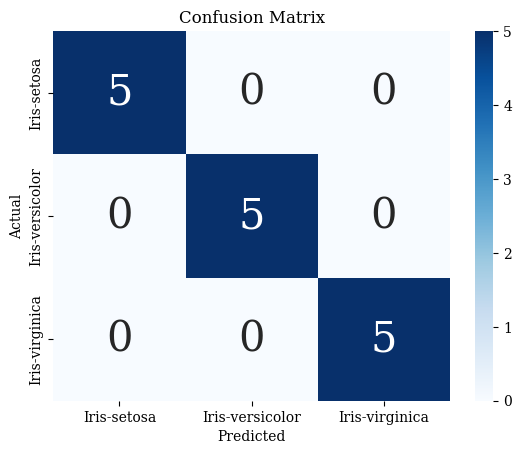

In [129]:
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
ax = plt.axes()
data_cm = cm
sns.heatmap(data_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax, xticklabels=class_names, yticklabels=class_names)
ax.set_title('Confusion Matrix')
plt.xlabel("Predicted") 
plt.ylabel("Actual")
plt.show()

In [130]:
ac = accuracy_score(y_test, y_pred)
rc = recall_score(y_test, y_pred, average="weighted")
pr = precision_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average='micro')

print("Accuracy    : ", ac)
print("Recall      : ", rc)
print("Precision   : ", pr)
print("F1 Score    : ", f1)

Accuracy    :  1.0
Recall      :  1.0
Precision   :  1.0
F1 Score    :  1.0


### Observation and Justification

The accuracy and precision is 100%. This means the model is able to classify the data correctly. We have plotted six plots for each pair of features possible. According to above plotted graphs, we can say that we can seperate Class setosa and Class versicolor by drawing a line and hence, can achieve 100% train accuracy as no class dots overlap with each other for majority of points.
Similarly, we can perform above task for Class setosa and Class virginica by drawing a line and therefore, achieve
100% train accuracy. Although we can seperate Class versicolor and Class Virginica using a line, but it can not be guaranteed that
train accuracy would be 100% since there are many dots overlapping with each other. Hence, we can not guarantee completely accurate predictions for all the dots near decision boundary and for the dots on other side of decision boundary, we will get wrong predictions.

# Question 5

Imbalanced dataset typically refers to a dataset where the classes are not represented equally. Classification problems having multiple classes with imbalanced dataset present a different challenge than a binary classification problem. The skewed distribution makes the machine learning algorithms less effective, especially in predicting minority class examples.

In this question you will perform logistic regression for multiclass classification on the 20 News groups dataset. Since this dataset is a balanced one, you will perform the pre-processing to create an imbalanced version of the dataset (by removing some news articles from some groups). One example is given below. Perform multiclass classification using logistic regression on both the balanced and the imbalanced version of the dataset. Compare the performance in each case by obtaining the confusion matrix and accuracy. Report you observations at the end. You can refer to this article for a better understanding of multiclass classification using logistic regression.

In [131]:
from sklearn.datasets import fetch_20newsgroups_vectorized

# Load the 20newsgroups dataset
X, y = fetch_20newsgroups_vectorized(subset="all", return_X_y=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.1, stratify=y)
train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

print(f"Dataset 20-newsgroup: {train_samples} training samples, {n_features} features, {n_classes} classes")


Dataset 20newsgroup: 16961 training samples, 130107 features, 20 classes


In [132]:

# Train a multinomial logistic regression model
lr = LogisticRegression(multi_class='multinomial', random_state=0)
lr.fit(X_train, y_train)

# Count the number of articles for each class
article_counts = [np.count_nonzero(y == i) for i in range(n_classes)]
print(f"Number of articles for each class: {article_counts}")

# Make predictions on the entire dataset
y_pred = lr.predict(X)

# Calculate the accuracy score
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy score: {accuracy}")


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Number of articles for each class: [799, 973, 985, 982, 963, 988, 975, 990, 996, 994, 999, 991, 984, 990, 987, 997, 910, 940, 775, 628]
Accuracy score: 0.889790937068874


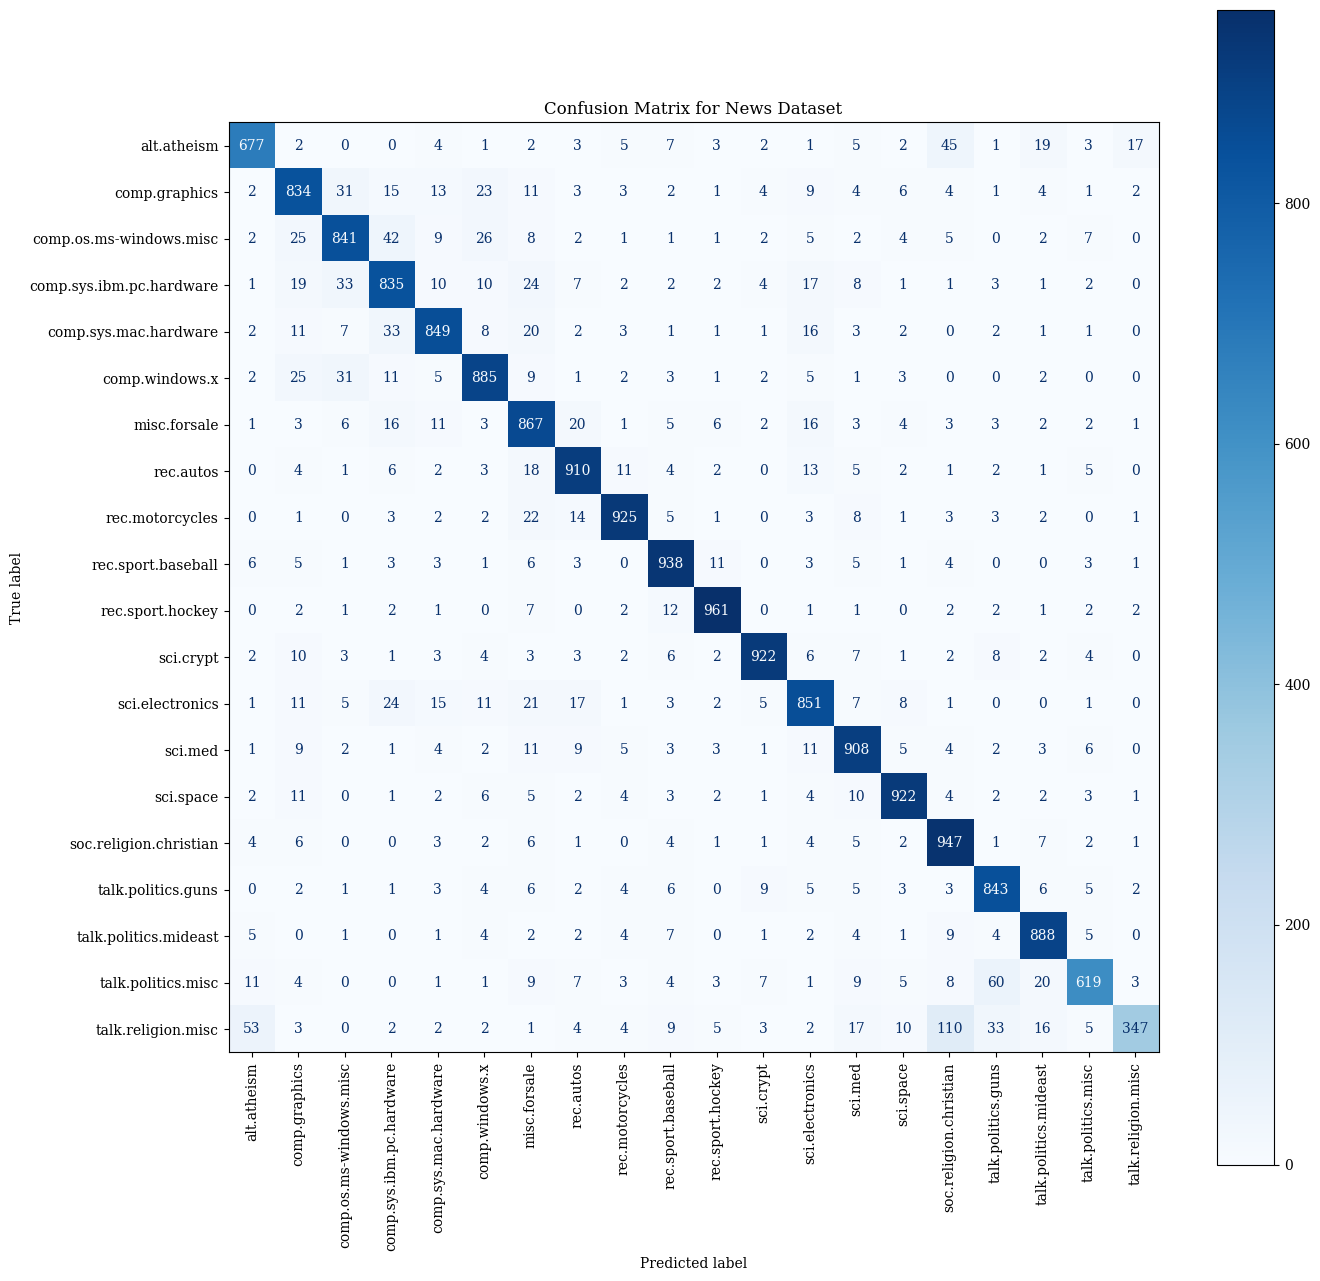

In [133]:

# Plot the confusion matrix as a heatmap with labels
plt.figure(figsize=(15, 15))
ax = plt.axes()
confusion_mat = confusion_matrix(y, y_pred)
target_names = fetch_20newsgroups_vectorized(subset='train').target_names
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=target_names)
disp.plot(xticks_rotation='vertical', ax=ax, cmap='Blues')
ax.set_title('Confusion Matrix for News Dataset')
plt.show()


# Unbalanced Dataset

In [134]:
X, y = fetch_20newsgroups_vectorized(subset="all", return_X_y=True)

# Create an imbalanced dataset by selecting different numbers of samples from each class
X_imbalanced = X[np.where(y == 0)][:500, :]
for i in range(1, 10):
    X_i = X[np.where(y == i)][:400, :]
    X_imbalanced = vstack([X_imbalanced, X_i])
for i in range(10, 15):
    X_i = X[np.where(y == i)][:300, :]
    X_imbalanced = vstack([X_imbalanced, X_i])
for i in range(15, 20):
    X_i = X[np.where(y == i)][:110, :]
    X_imbalanced = vstack([X_imbalanced, X_i])

# Create the corresponding labels for the imbalanced dataset
y_imbalanced = np.zeros(X_imbalanced.shape[0])
id = 0
for i in range(0, 10):
    for j in range(400):
        y_imbalanced[id] = i
        id += 1
for i in range(10, 15):
    for j in range(300):
        y_imbalanced[id] = i
        id += 1
for i in range(15, 20):
    for j in range(110):
        y_imbalanced[id] = i
        id += 1

# Count the number of articles for each class in the imbalanced dataset
n_classes = np.unique(y).shape[0]
article_counts = [np.count_nonzero(y_imbalanced == i) for i in range(n_classes)]
print(f"Number of articles for each class: {article_counts}")

# Split the imbalanced data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imbalanced, y_imbalanced, random_state=0, test_size=0.1, stratify=y_imbalanced)
train_samples, n_features = X_train.shape

print(f"Imbalanced dataset: {train_samples} training samples, {n_features} features")


Number of articles for each class: [500, 400, 400, 400, 400, 400, 400, 400, 400, 400, 300, 300, 300, 300, 300, 110, 110, 110, 110, 110]
Imbalanced dataset: 5535 training samples, 130107 features


In [135]:

# Train a multinomial logistic regression model on the imbalanced data
lr = LogisticRegression(multi_class='multinomial', random_state=0)
lr.fit(X_train, y_train)

# Make predictions on the entire dataset (not just the imbalanced data)
y_pred = lr.predict(X)

# Calculate the accuracy score
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy score: {accuracy}")


Accuracy score: 0.5328982277406347


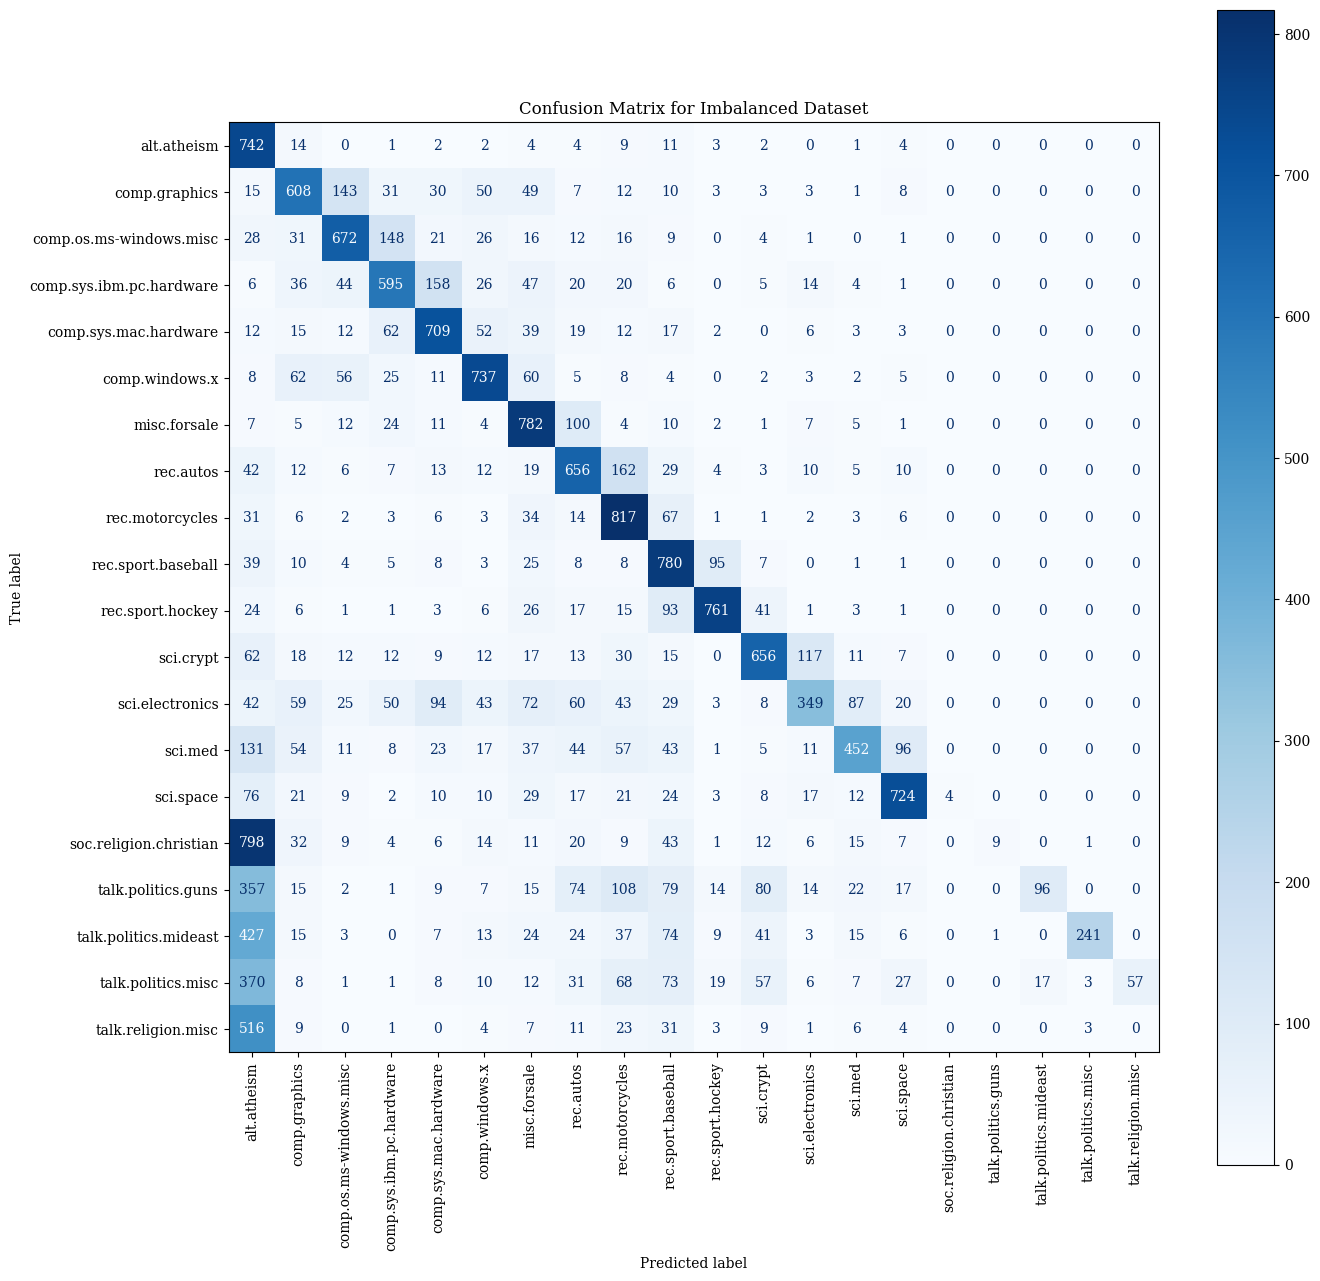

In [136]:

# Plot the confusion matrix as a heatmap with labels
plt.figure(figsize=(15, 15))
ax = plt.axes()
confusion_mat = confusion_matrix(y, y_pred)
target_names = fetch_20newsgroups_vectorized(subset='train').target_names
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=target_names)
disp.plot(xticks_rotation='vertical', ax=ax, cmap='Blues')
ax.set_title('Confusion Matrix for Imbalanced Dataset')
plt.show()


### Balanced Datasets

In a **balanced dataset**, where each class has approximately the same number of instances, precision, recall, and F1 score are typically close to each other. This is because the model has been trained with an equal representation of each class, allowing it to learn to distinguish between classes effectively.

### Imbalanced Datasets

However, in an **imbalanced dataset**, where one class (the majority class) has significantly more instances than the other classes, these metrics can behave differently. The model may achieve perfect or near-perfect precision, recall, and F1 score for the majority class. This is because the model is biased towards predicting the majority class due to its over-representation in the training data.

For the minority classes (second most major and so on), these metrics will be lower. This indicates that the model is less effective at predicting instances of these classes. It's important to note that even though a model trained on an imbalanced dataset may have high overall accuracy, it may still be weak at predicting minority classes.

In balanced dataset precision, recall and f1 score are close to each other whereas in imbalanced dataset major class has perfect precision, recall and f1 score; then, second most major and so on. This implies that even though both have same accuracy model trained with imbalanced dataset is weak at predicting minority classes.
